# Contraction on average factor approximation

This notebook shows how to get approximation of the Lipschitz constant of the system\
For the demonstration purposes, model with ReLU controller will be used.\
For more detailed process of creation of the system model, see `basic_simulation_ReLU.ipynb` example notebook

In [1]:
%load_ext autoreload
%autoreload 2

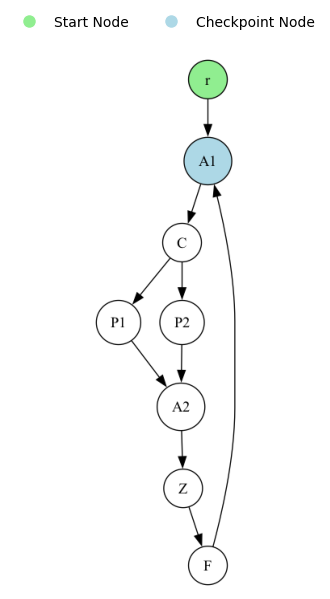

In [2]:
import numpy as np

from example_systems.example_ReLU_system import ExampleReLUSim
from tests.contractionTests.contraction_test import get_factor_from_list
ExampleReLUSim().plot.render_graph()

## System can be trained on specific reference signal using train() method

In [206]:
sim = ExampleReLUSim(reference_signal=-50.0)
sim.system.train(destination_file="./weights/weights_trained.pth", iterations=80, reruns=10, show_loss=False)

In [207]:
# sim = ExampleReLUSim(reference_signal=20.0, weights="./weights/weights_basic_ReLU.pth")
sim = ExampleReLUSim(reference_signal=-50.0, weights="./weights/weights_trained.pth")
sim.system.run(iterations=200)

Running Control System: 100%|██████████| 200/200 [00:00<00:00, 278.10it/s]


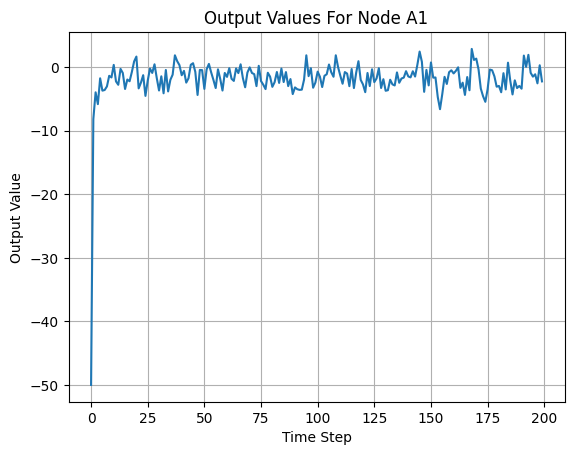

In [208]:
sim.plot.node_outputs("A1")

### Contraction factor approximation.

Call get_factor function specifying set of the reference signals.
In order to get approximated value, we run simulations with different combinations of the tweaked agents probability parameters (Specifically, for agents with two possible response functions, that are picked randomly, with the probability 0.5, we run simulations where probabilities of picking f1 are set either to `eps`, or `1-eps` (edge cases), after obtaining maximum gradient value for each probability combination, we take weighted average of them).

In [212]:
eps = 0.05
reference_signals = np.array([-50])

In [210]:
approximated_lipschitz = get_factor_from_list(reference_signals=reference_signals, agent_probs=np.array([[eps, 1.0 - eps], [eps, 1.0 - eps]]), sim_class=ExampleReLUSim, it=200, trials=5, weights="./weights/weights_trained.pth")
for i in range(len(reference_signals)):
    print(f"Approximated Contraction factor value for reference signal = {reference_signals[i]} is equal to {approximated_lipschitz[i]}")

KeyboardInterrupt: 

### Visualization

In order to observe the behaviour of the sampled simulations, and measured gradients, use `make_plots=True` flag. 

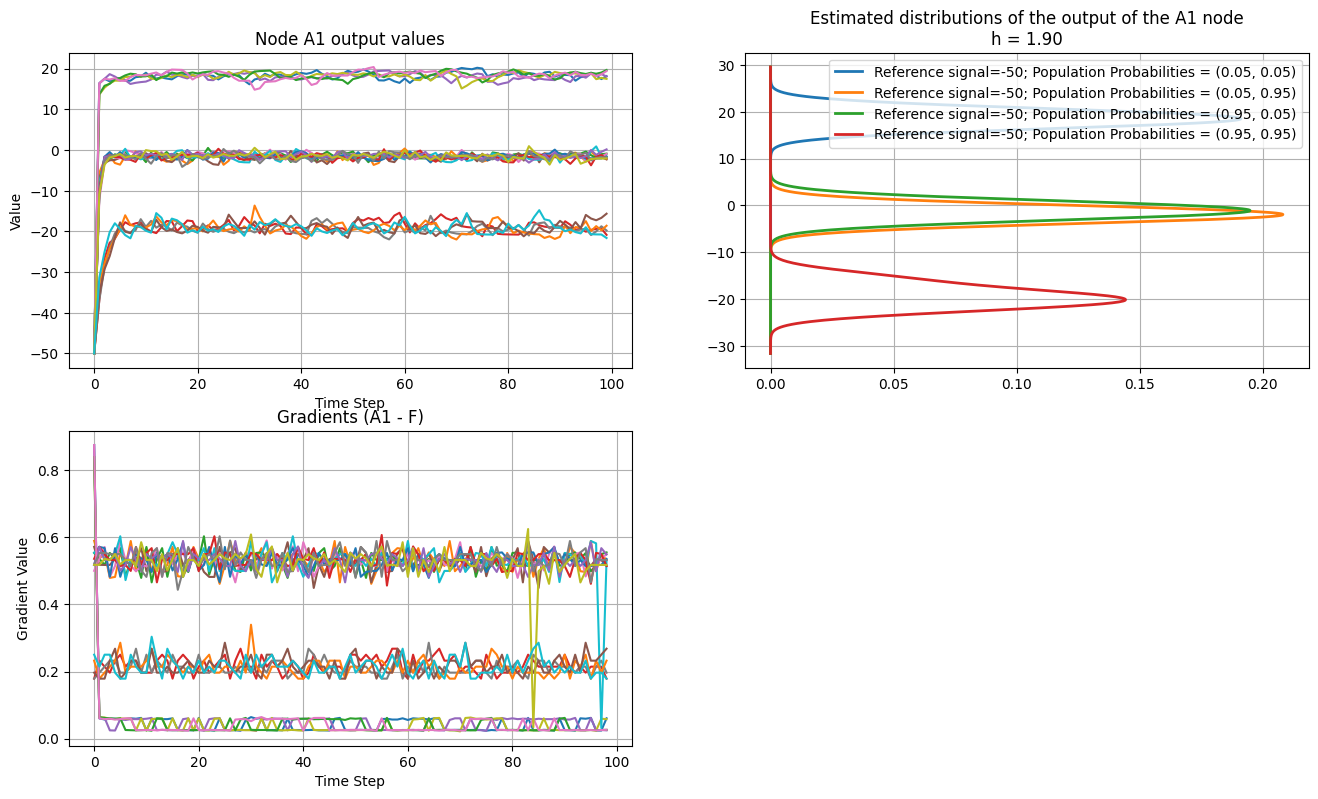

Approximated Contraction factor value for reference signal = -50 is equal to 0.6020343229174614


In [215]:
approximated_lipschitz = get_factor_from_list(reference_signals=reference_signals, agent_probs=np.array([[eps, 1.0-eps], [eps, 1.0-eps]]), sim_class=ExampleReLUSim, it=100, trials=5, weights="./weights/weights_trained.pth", node_outputs_plot="A1", show_distributions_plot=True, show_distributions_histograms_plot=False)
for i in range(len(reference_signals)):
    print(f"Approximated Contraction factor value for reference signal = {reference_signals[i]} is equal to {approximated_lipschitz[i]}")

### Probability distribution of the node output

It is also possible to get the probability distribution estimation of the node output for the set of reference signals.\
Probability distribution is estimated using [Kernel Density Distribution](https://en.wikipedia.org/wiki/Kernel_density_estimation) on the `samples` sample runs outputs after `iterations` iterations.


(Currently this estimation is exclusive for A1 node, which outputs the difference between reference signal and actual filtered system output)

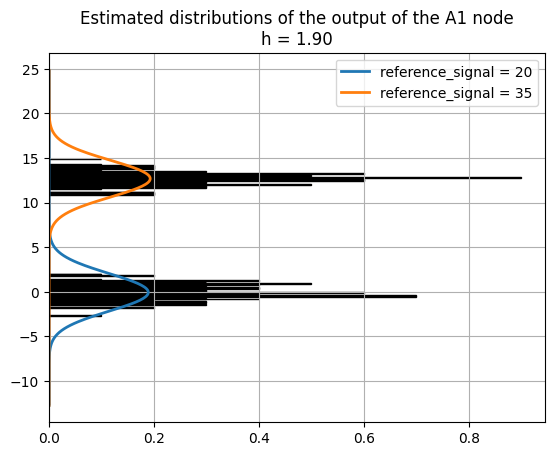

In [20]:
from humancompatible.interconnect.simulators.distribution import *
h = 1.9
step = 0.1
iterations=100
samples = 100
reference_signals = np.array([20, 35])

fig, ax = plt.subplots()
outputs = generate_outputs(sim_class=ExampleReLUSim, reference_signals=reference_signals, node="A1", iterations=iterations, samples=samples)
distributions = get_distributions(x=outputs, h=h, labels=[f"reference_signal = {r}" for r in reference_signals], step=step, node="A1", show_plots=True, show_histograms=True, fig=fig, ax=ax)

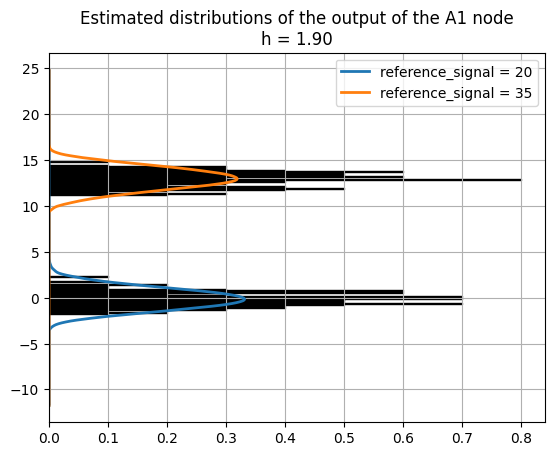

In [21]:
h = 1.9
step = 0.1
iterations=100
samples = 100
reference_signals = np.array([20, 35])

def epanechnikov_kernel(y):
    return 3/4 * (1 - y**2) * (np.abs(y) <= 1)

fig, ax = plt.subplots()
outputs = generate_outputs(sim_class=ExampleReLUSim, reference_signals=reference_signals, node="A1", iterations=iterations, samples=samples)
distributions = get_distributions(x=outputs, kernel=epanechnikov_kernel, h=h, labels=[f"reference_signal = {r}" for r in reference_signals], step=step, node="A1", show_plots=True, show_histograms=True, fig=fig, ax=ax)